# Definição de Inferência Bayesiana

**Inferência bayesiana** é um método de inferência estatística que utiliza o **Teorema de Bayes** para atualizar a incerteza sobre um parâmetro a partir de uma **distribuição a priori** e dos **dados observados**, resultando em uma **distribuição a posteriori** que representa o conhecimento atualizado sobre o parâmetro.

Este notebook tem como objetivo apresentar os conceitos básicos da inferência bayesiana.

# Teorema de Bayes

A inferência bayesiana baseia-se na seguinte fórmula:

$$
 \Pr(H|D) = \frac{\Pr(D|H) \cdot \Pr(H)}{\Pr(D)}
$$

- $\Pr(H)$: Probabilidade a priori da hipótese
- $\Pr(D|H)$: Verossimilhança
- $\Pr(H|D)$: Probabilidade a posteriori
- $\Pr(D)$: Evidência (constante de normalização)

**Exemplo: Teste Diagnóstico**

Considere:
- Prevalência da doença: 1% $\Pr(D) = 0{,}01$
- Sensibilidade: 99% $\Pr(+|D) = 0{,}99$
- Especificidade: 95% $\Pr(-|\neg D) = 0{,}95$

Qual a probabilidade de realmente estar doente após um teste positivo?

Solução no bloco de código abaixo.

In [3]:
P_d = 0.01
P_pos_d = 0.99
P_pos_notd = 0.05

# Teorema de Bayes:
P_pos = P_pos_d * P_d + P_pos_notd * (1 - P_d)
P_d_pos = (P_pos_d * P_d) / P_pos

print(f"P(doente | positivo) = {P_d_pos:.3f}")

P(doente | positivo) = 0.167


# Distribuições a priori e a posteriori

Há dois tipos de distribuições fundamentais na inferência bayesiana.

## Distribuição a Priori

A **distribuição a priori** (ou simplesmente **priori**) representa o conhecimento ou crença que se tem sobre um parâmetro antes da observação dos dados.

Ela é denotada por $p(\theta)$, onde $\theta$ é o parâmetro desconhecido (por exemplo, uma proporção, uma média, uma taxa etc.).

### Exemplo:

Suponha que você vai analisar uma moeda, mas antes de lançá-la, você acredita que ela seja justa. Isso pode ser representado por uma distribuição Beta(1,1), que é uma distribuição uniforme no intervalo \[0,1], indicando que todas as probabilidades são igualmente plausíveis inicialmente.

---

## Distribuição a Posteriori

A **distribuição a posteriori** é o resultado da atualização da distribuição a priori com a informação contida nos dados observados.

Ela é denotada por $p(\theta \mid \text{dados})$ e obtida usando o **Teorema de Bayes**:

$$
p(\theta \mid \text{dados}) = \frac{p(\text{dados} \mid \theta) \cdot p(\theta)}{p(\text{dados})}
$$

Nesta fórmula:

* $p(\theta)$ é a distribuição a priori.
* $p(\text{dados} \mid \theta)$ é a **verossimilhança**, ou seja, a probabilidade dos dados, uma vez que se fixa $\theta$.
* $p(\theta \mid \text{dados})$ é a distribuição a posteriori.
* $p(\text{dados})$ é uma constante de normalização, chamada **evidência**.

### Exemplo (continuação):

Após lançar a moeda 10 vezes e observar 7 caras, atualizamos nossa crença. A nova distribuição sobre $\theta$ será uma Beta(8,4), que é mais concentrada em torno de valores próximos a 0,7. Essa é a **posteriori** — ela reflete tanto os dados observados quanto a priori.

---

## Comparação

| Característica            | Distribuição a Priori            | Distribuição a Posteriori                   |
| ------------------------- | -------------------------------- | ------------------------------------------- |
| Antes ou depois dos dados | Antes dos dados                  | Depois de observar os dados                 |
| Representa                | Crença inicial sobre o parâmetro | Crença atualizada após ver os dados         |
| Incorporação de dados     | Não inclui dados                 | Inclui os dados por meio da verossimilhança |


---
## Exemplo

O gráfico abaixo como a distribuição a priori é atualizada para formar a posteriori, com base em diferentes quantidades de dados. O objetivo é demonstrar visualmente o papel da **quantidade de dados** na **precisão da inferência bayesiana**: mais dados tornam a posteriori mais “afiada” (concentrada).

* **Priori (Beta(1,1))**: todos os valores de $\theta$ são igualmente prováveis inicialmente (linha cinza).
* **Posteriori com poucos dados (Beta(5,2))**: após observar 4 sucessos em 5, a distribuição se desloca para perto de $\theta = 0{,}8$, mas ainda é relativamente espalhada.
* **Posteriori com muitos dados (Beta(81,21))**: com 80 sucessos em 100, a distribuição se concentra fortemente em torno de $\theta = 0{,}8$, refletindo maior confiança.

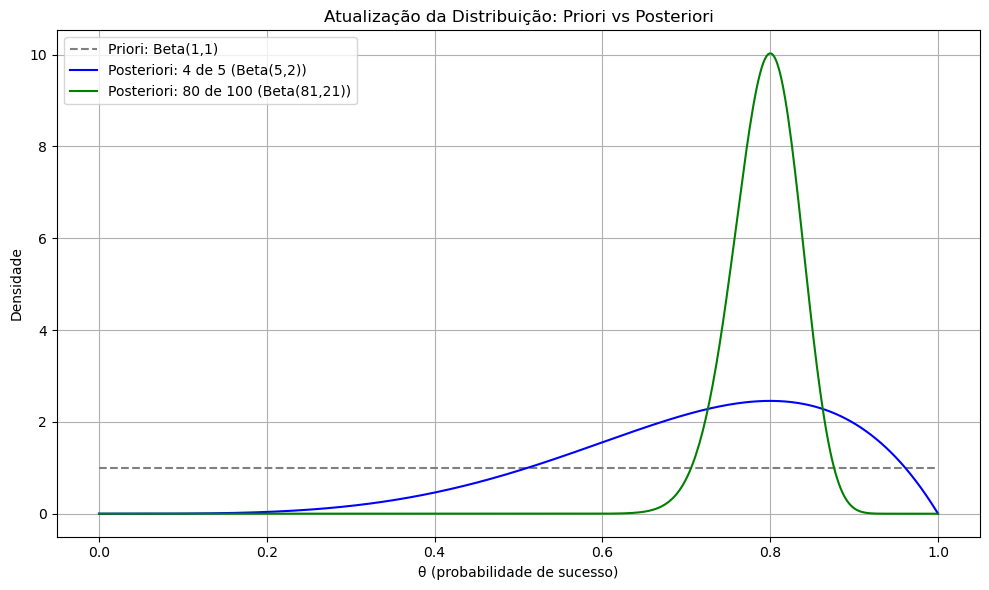

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Valores para comparação: 3 cenários
theta = np.linspace(0, 1, 500)

# Priori (antes dos dados): Beta(1, 1)
prior_pdf = beta.pdf(theta, 1, 1)

# Posteriori com poucos dados: 4 sucessos em 5 (Beta(5,2))
posterior_poucos_dados = beta.pdf(theta, 1+4, 1+1)

# Posteriori com muitos dados: 80 sucessos em 100 (Beta(81,21))
posterior_muitos_dados = beta.pdf(theta, 1+80, 1+20)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, '--', label='Priori: Beta(1,1)', color='gray')
plt.plot(theta, posterior_poucos_dados, label='Posteriori: 4 de 5 (Beta(5,2))', color='blue')
plt.plot(theta, posterior_muitos_dados, label='Posteriori: 80 de 100 (Beta(81,21))', color='green')

plt.title('Atualização da Distribuição: Priori vs Posteriori')
plt.xlabel('θ (probabilidade de sucesso)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Atualização de uma distribuição

A ideia de que **uma distribuição** (algo abstrato, matemático) possa ser “atualizada” não é intuitiva. Vamos tornar isso mais acessível com uma analogia e uma explicação passo a passo.

---

### Como “atualizar uma distribuição” pode ser entendido?

#### 1. **Analogia com opinião e experiência**

Imagine que você é um médico e está avaliando um novo paciente.

* Antes de examinar o paciente, com base na sua experiência geral, você acha que a chance de ele ter uma determinada doença é **baixa**. Essa é sua **opinião inicial**, que corresponde à **distribuição a priori**.

* Depois, você coleta **novas informações**: sintomas, exames laboratoriais, etc. Esses dados influenciam a sua opinião.

* Agora, você **reavalia a chance** de o paciente ter a doença. Essa nova avaliação é a sua **opinião atualizada**, ou seja, a **distribuição a posteriori**.

Assim como você ajusta sua opinião com base em evidências, o modelo bayesiano ajusta sua **distribuição de probabilidades** com base nos dados.

---

#### 2. **Visualização da mudança**

Uma distribuição mostra **quão provável você considera cada valor possível de um parâmetro**.

* A **priori** diz: “antes de ver os dados, acho que tais valores são mais prováveis”.

* A **posteriori** diz: “agora que vi os dados, considero outros valores mais prováveis”.

**Não estamos alterando os dados. Estamos alterando o nosso grau de crença nos diferentes valores possíveis do parâmetro.**

---

#### 3. **Exemplo numérico simples**

Suponha que desejamos estimar a probabilidade de uma moeda dar cara.

* **Antes de lançar**, podemos achar que ela é justa: $\theta \sim \text{Beta}(1,1)$ (todos os valores igualmente prováveis).

* Lançamos 10 vezes e vemos 8 caras.

* Agora, valores de $\theta$ próximos de 0,8 passam a ser **mais plausíveis** do que valores perto de 0,5. A distribuição muda para $\text{Beta}(9,3)$.

A forma da curva muda. Ela “se inclina” para onde os dados indicam que o parâmetro provavelmente está.

---

#### 4. **Por que chamar isso de "atualização"?**

Porque a distribuição final depende de:

* O que se acreditava antes (**priori**),
* O que foi observado (**dados/verossimilhança**),
* Com as duas informações acima, podemos calcular a **distribuição posteriori**.

Essa mudança é formal, feita por meio do **Teorema de Bayes**, mas o raciocínio é o mesmo que usamos no dia a dia: ver algo novo → reconsiderar o que achamos.

---

## Exemplo com Distribuições: Moeda Viciada

São observadas 7 caras em 10 lançamentos de uma moeda viciada. Qual a distribuição a posteriori da probabilidade de cara?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Dados
n = 10
x = 7

# Priori: Beta(1,1)
a_prior, b_prior = 1, 1

# Posteriori: Beta(1 + 7, 1 + 3)
a_post = a_prior + x
b_post = b_prior + n - x

# Visualização
theta = np.linspace(0, 1, 500)
plt.plot(theta, beta.pdf(theta, a_post, b_post), label='Posteriori Beta(8,4)')
plt.plot(theta, beta.pdf(theta, a_prior, b_prior), '--', label='Priori Beta(1,1)')
plt.title('Distribuição a posteriori de θ')
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()

# Exercício

São observados 12 sucessos em 20 tentativas. Assuma uma priori $\text{Beta}(2,2)$.

1. Calcule os parâmetros da posteriori.
2. Plote a função densidade.
3. Calcule a média e o intervalo de 95%.
4. Interprete os resultados.

A solução para este exercício está no bloco de código abaixo.

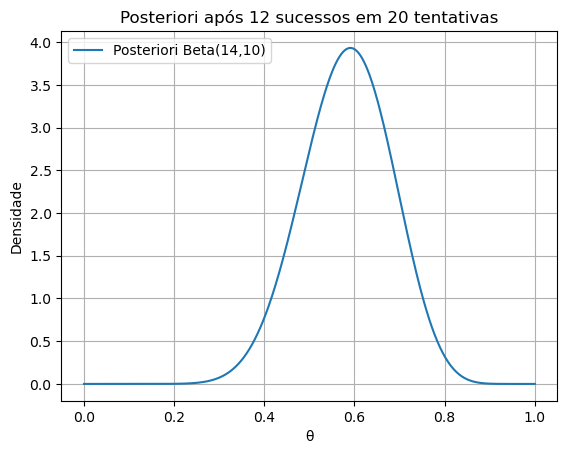

Média: 0.583
Intervalo de 95%: (0.385, 0.768)


In [2]:
n = 20
x = 12
a_prior, b_prior = 2, 2
a_post = a_prior + x
b_post = b_prior + n - x

# Plotando a posteriori
theta = np.linspace(0, 1, 500)
plt.plot(theta, beta.pdf(theta, a_post, b_post), label=f'Posteriori Beta({a_post},{b_post})')
plt.title('Posteriori após 12 sucessos em 20 tentativas')
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()

# Estatísticas
media = a_post / (a_post + b_post)
intervalo = beta.ppf([0.025, 0.975], a_post, b_post)
print(f"Média: {media:.3f}")
print(f"Intervalo de 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")

# Intervalo de Credibilidade

Por definição, **intervalo de credibilidade** é um intervalo que contém, com uma determinada probabilidade (por exemplo, 95%), o valor verdadeiro de um parâmetro, de acordo com a **distribuição a posteriori** obtida pela inferência bayesiana.

Em outras palavras:

> É o intervalo onde o parâmetro tem uma determinada **probabilidade de estar**, dado os dados observados e a distribuição a priori assumida.


No exemplo de código acima, encontramos o trecho:

```python
intervalo = beta.ppf([0.025, 0.975], a_post, b_post)
```

Esse trecho está computando os **quantis** de ordem 2,5% e 97,5% da **distribuição Beta(a\_post, b\_post)** — ou seja, da **distribuição a posteriori** de $\theta$, obtida via inferência bayesiana.

Portanto:

> Esse é um intervalo de credibilidade bayesiano de 95%.

Ele diz: *com base na distribuição a posteriori de $\theta$, há 95% de probabilidade de que o valor verdadeiro de $\theta$ esteja entre os dois quantis computados.*

---

## Intervalo de credibilidade x intervalo de confiança

Embora numericamente semelhantes em muitos casos, **intervalos de credibilidade** e **intervalos de confiança** têm interpretações fundamentais diferentes:

| Característica                  | Intervalo de Confiança (frequentista)                 | Intervalo de Credibilidade (bayesiano)                    |
| ------------------------------- | ----------------------------------------------------- | --------------------------------------------------------- |
| O parâmetro é...                | fixo e desconhecido                                   | uma variável aleatória                                    |
| Interpretação                   | em 95% dos experimentos, o intervalo conterá $\theta$ | há 95% de probabilidade de $\theta$ estar nesse intervalo |
| Base de cálculo                 | distribuição amostral do estimador                    | distribuição a posteriori do parâmetro                    |
| Depende de conhecimento prévio? | não                                                   | sim (via distribuição a priori)                           |

---

Como exemplo da diferença de interpretação entre intervalos de credibilidade e de confiança, suponha que o intervalo seja $[0.45, 0.78]$.

* **Bayesiano (credibilidade):**
  Dado o que sabemos (dados + priori), há 95% de chance de que $\theta$ esteja nesse intervalo.

* **Frequentista (confiança):**
  Se repetirmos esse procedimento muitas vezes com novas amostras, 95% dos intervalos construídos conterão o verdadeiro valor de $\theta$.
  **Mas para o intervalo específico obtido, não podemos afirmar nenhuma probabilidade.**

Podemos concluir que um intervalo de credibilidade tem significado probabilístico direto sobre $\theta$, o que é uma das vantagens da abordagem bayesiana. O intervalo de credibilidade é diferente do intervalo de confiança frequentista, embora possam ser semelhantes em valores, especialmente com grandes amostras e priors não informativas.

# Abordagens bayesiana e frequentista

Esta seção apresenta uma comparação entre as abordagens **bayesiana** e **frequentista** em inferência estatística, incluindo suas definições, diferenças fundamentais e contextos de aplicação mais adequados.

## Abordagem Frequentista

### Visão geral

* Baseia-se na ideia de que a **probabilidade é a frequência relativa** de um evento ao longo de repetições hipotéticas de um experimento.
* Os **parâmetros são fixos e desconhecidos**; a incerteza vem apenas dos dados amostrados.
* Inferência é feita por meio de:

  * Estimadores pontuais (como média amostral),
  * Intervalos de confiança,
  * Testes de hipótese.

### Exemplo:

Estimar a proporção de sucesso em uma população com base em uma amostra. O parâmetro é considerado fixo, e as propriedades de um estimador são avaliadas com base na sua distribuição amostral, ou seja, na distribuição de probabilidade que ele induz sob repetições do experimento de amostragem.

---

## Abordagem Bayesiana

### Visão geral

* Define **probabilidade como um grau de crença** sobre a veracidade de uma hipótese ou valor de um parâmetro.
* Os **parâmetros são tratados como variáveis aleatórias**, com distribuições de probabilidade que expressam incerteza.
* A inferência baseia-se no **Teorema de Bayes**, combinando:

  * Uma **distribuição a priori** (crença anterior),
  * Uma **verossimilhança** (informação dos dados),
  * Para obter uma **distribuição a posteriori** (crença atualizada).

### Exemplo:

Ao observar 8 caras em 10 lançamentos, atualiza-se uma priori Beta sobre $\theta$ (probabilidade de cara) para obter uma posteriori mais concentrada.

---

## Comparação

| Aspecto                    | Frequentista                   | Bayesiano                              |
| -------------------------- | ------------------------------ | -------------------------------------- |
| Definição de probabilidade | Frequência em repetições       | Grau de crença                         |
| Parâmetros                 | Fixos e desconhecidos          | Variáveis aleatórias com distribuições |
| Incerteza                  | Vem dos dados                  | Vem dos dados e da priori              |
| Inferência                 | Intervalo de confiança, testes | Distribuição a posteriori              |
| Uso de informação prévia   | Não                            | Sim (via distribuição a priori)        |
| Resposta típica            | Estimativa pontual e IC        | Distribuição completa do parâmetro     |

---

## Quando usar cada abordagem?

### Frequentista – mais adequada quando:

* Há **grande quantidade de dados** disponíveis.
* É necessário seguir **normas padronizadas** (ex: publicações biomédicas, testes regulatórios).
* A interpretação de probabilidades subjetivas não é desejada.
* Computação simples é importante (ex: inferência analítica via fórmulas).

### Bayesiana – mais adequada quando:

* Há **poucos dados**, e **informações prévias confiáveis** podem ser incorporadas.
* O foco é em **atualização de crenças** à medida que os dados chegam (ex: séries temporais, decisões sequenciais).
* Deseja-se obter **distribuições completas** para tomada de decisão.
* Modelos complexos exigem **flexibilidade** (ex: hierárquicos, MCMC).

---

## Conclusão

A escolha entre abordagens **não é uma oposição absoluta**, mas sim uma questão de adequação ao contexto:

* Frequentismo é robusto e padronizado.
* Bayes é flexível e naturalmente adaptável a incertezas e decisões.

Na prática, muitos estatísticos usam ambas as abordagens, conforme o problema exige.

Se quiser, posso gerar um notebook interativo com exemplos lado a lado. Deseja isso?
